<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas for Exploratory Data Analysis

_Author: Kevin Markham (Washington, D.C.)_

---

## Learning Objectives

- Define what Pandas is and how it relates to data science.
- Manipulate Pandas `DataFrames` and `Series`.
- Filter and sort data using Pandas.
- Manipulate `DataFrame` columns.
- Know how to handle null and missing values.

## Lesson Guide

- [What Is Pandas?](#pandas)
- [Reading Files, Selecting Columns, and Summarizing](#reading-files)
    - [Exercise 1](#exercise-one)
    
    
- [Filtering and Sorting](#filtering-and-sorting)
    - [Exercise 2](#exercise-two)
    
    
- [Renaming, Adding, and Removing Columns](#columns)
- [Handling Missing Values](#missing-values)
    - [Exercise 3](#exercise-three)
    
    
- [Split-Apply-Combine](#split-apply-combine)
    - [Exercise 4](#exercise-four)
    
    
- [Selecting Multiple Columns and Filtering Rows](#multiple-columns)
- [Joining (Merging) DataFrames](#joining-dataframes)
- [OPTIONAL: Other Commonly Used Features](#other-features)
- [OPTIONAL: Other Less Used Features of Pandas](#uncommon-features)
- [Summary](#summary)

<a id="pandas"></a>

## What Is Pandas?

- **Objective:** Define what Pandas is and how it relates to data science.

Pandas is a Python library that primarily adds two new datatypes to Python: `DataFrame` and `Series`.

- A `Series` is a sequence of items, where each item has a unique label (called an `index`).
- A `DataFrame` is a table of data. Each row has a unique label (the `row index`), and each column has a unique label (the `column index`).
- Note that each column in a `DataFrame` can be considered a `Series` (`Series` index).

> Behind the scenes, these datatypes use the NumPy ("Numerical Python") library. NumPy primarily adds the `ndarray` (n-dimensional array) datatype to Pandas. An `ndarray` is similar to a Python list — it stores ordered data. However, it differs in three respects:
> - Each element has the same datatype (typically fixed-size, e.g., a 32-bit integer).
> - Elements are stored contiguously (immediately after each other) in memory for fast retrieval.
> - The total size of an `ndarray` is fixed.

> Storing `Series` and `DataFrame` data in `ndarray`s makes Pandas faster and uses less memory than standard Python datatypes. Many libraries (such as scikit-learn) accept `ndarray`s as input rather than Pandas datatypes, so we will frequently convert between them.


### Using Pandas

Pandas is frequently used in data science because it offers a large set of commonly used functions, is relatively fast, and has a large community. Because many data science libraries also use NumPy to manipulate data, you can easily transfer data between libraries (as we will often do in this class!).

Pandas is a large library that typically takes a lot of practice to learn. It heavily overrides Python operators, resulting in odd-looking syntax. For example, given a `DataFrame` called `cars` which contains a column `mpg`, we might want to view all cars with mpg over 35. To do this, we might write: `cars[cars['mpg'] > 35]`. In standard Python, this would most likely give a syntax error. (**Challenge:** Using only built-in datatypes, can you define `cars` and `mpg` to make this expression valid?)

Pandas also highly favors certain patterns of use. For example, looping through a `DataFrame` row by row is highly discouraged. Instead, Pandas favors using **vectorized functions** that operate column by column. (This is because each column is stored separately as an `ndarray`, and NumPy is optimized for operating on `ndarray`s.)

Do not be discouraged if Pandas feels overwhelming. Gradually, as you use it, you will become familiar with which methods to use and the "Pandas way" of thinking about and manipulating data.

### Methods and Attributes

Pandas `DataFrame`s are python objects and therefore come with attributes and methods. To access these, follow the variable name with a dot. For example, given a `DataFrame` called `users`:

```
- users.index       # accesses the `index` attribute -- note there are no parentheses. attributes are not callable
- users.head()      # calls the `head` method (since there are open/closed parentheses)
- users.head(10)    # calls the `head` method with parameter `10`, indicating the first 10 rows. this is the same as:
- users.head(n=10)  # calls the `head` method, setting the named parameter `n` to have a value of `10`.
```

We know that the `head` method accepts one parameter with an optional name of `n` because it is in the documentation for that method. Let's see how to view the documentation next.

### Viewing Documentation

There are a few ways to find more information about a method.

**Method 1:** In Jupyter, you can quickly view documentation for a method by following the method name by a `?`, as follows:

```
users.head?
```

> ```
Signature: users.head(n=5)
Docstring: Returns first n rows
```

Notice that we would normally invoke this method by calling `users.head(5)`. One quirk of IPython is that the `?` symbol must be the last character in the cell. Otherwise, it might not work.

> The `?` is a shortcut for the built-in Python function `help`, which returns the method's docstring. For example:
> ```
help(users.head)
```

**Method 2:** You can also search online for the phrase "`DataFrame head`", since you are calling the method `head` on the `users` object, which happens to be a `DataFrame`. (`type(users) => pandas.DataFrame`)

You can alternatively search online for `pandas head`, but be careful! `DataFrame` and `Series` both have a `head` method, so make sure you view the documentation for the correct one since they might be called differently. You will know you are looking at the correct documentation page because it will say `DataFrame.head` at the top, instead of `Series.head`.

## Pandas

In [1]:
# Load Pandas into Python
import pandas as pd
from matplotlib import pyplot as plt
 
%matplotlib inline

<a id="reading-files"></a>
### Reading Files, Selecting Columns, and Summarizing

In [2]:
# Read "u.user" into "users".
users = pd.read_table('data/user.tbl', sep='|')

**Examine the users data.**

In [3]:
users                   # Print the first 30 and last 30 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [4]:
type(users)             # DataFrame

pandas.core.frame.DataFrame

In [5]:
users.head()            # Print the first five rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
users.head(10)          # Print the first 10 rows.

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
5,6,42,M,executive,98101
6,7,57,M,administrator,91344
7,8,36,M,administrator,05201
8,9,29,M,student,01002
9,10,53,M,lawyer,90703


In [7]:
users.tail()            # Print the last five rows.

,user_id,age,gender,occupation,zip_code
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209
942,943,22,M,student,77841


In [8]:
# Concise summary (including memory usage) — useful to quickly see if nulls exist
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
gender        943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [9]:
 # The row index (aka "the row labels" — in this case integers)
users.index            

RangeIndex(start=0, stop=943, step=1)

In [10]:
# Column names (which is "an index")
users.columns

Index([u'user_id', u'age', u'gender', u'occupation', u'zip_code'], dtype='object')

In [11]:
# Datatypes of each column — each column is stored as an ndarray, which has a datatype
users.dtypes

user_id        int64
age            int64
gender        object
occupation    object
zip_code      object
dtype: object

In [12]:
# Number of rows and columns
users.shape

(943, 5)

In [13]:
# All values as a NumPy array
users.values  

array([[1, 24, 'M', 'technician', '85711'],
       [2, 53, 'F', 'other', '94043'],
       [3, 23, 'M', 'writer', '32067'],
       ..., 
       [941, 20, 'M', 'student', '97229'],
       [942, 48, 'F', 'librarian', '78209'],
       [943, 22, 'M', 'student', '77841']], dtype=object)

** Select or index data.**<br>
Pandas `DataFrame`s have structural similarities with Python-style lists and dictionaries.  
In the example below, we select a column of data using the name of the column in a similar manner to how we select a dictionary value with the dictionary key.

In [14]:
# Select a column — returns a Pandas Series (essentially an ndarray with an index)
users['gender']

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

In [135]:
# DataFrame columns are Pandas Series.
type(users['gender'])

pandas.core.series.Series

In [136]:
type(users[['gender']])

pandas.core.frame.DataFrame

In [16]:
# Select one column using the DataFrame attribute.
users.gender

# While a useful shorthand, these attributes only exist
# if the column name has no punctuations or spaces.

0      M
1      F
2      M
3      M
4      F
5      M
6      M
7      M
8      M
9      M
10     F
11     F
12     M
13     M
14     F
15     M
16     M
17     F
18     M
19     F
20     M
21     M
22     F
23     F
24     M
25     M
26     F
27     M
28     M
29     M
      ..
913    F
914    M
915    M
916    F
917    M
918    M
919    F
920    F
921    F
922    M
923    M
924    F
925    M
926    M
927    M
928    M
929    F
930    M
931    M
932    M
933    M
934    M
935    M
936    M
937    F
938    F
939    M
940    M
941    F
942    M
Name: gender, Length: 943, dtype: object

**Summarize (describe) the data.**<br>
Pandas has a bunch of built-in methods to quickly summarize your data and provide you with a quick general understanding.

In [17]:
# Describe all numeric columns.
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [18]:
# Describe all object columns (can include multiple types).
users.describe(include=['object']) 

,gender,occupation,zip_code
count,943,943,943
unique,2,21,795
top,M,student,55414
freq,670,196,9


In [19]:
# Describe all columns, including non-numeric.
users.describe(include='all')

,user_id,age,gender,occupation,zip_code
count,943.000000,943.000000,943,943,943
unique,NaN,NaN,2,21,795
top,NaN,NaN,M,student,55414
freq,NaN,NaN,670,196,9
mean,472.000000,34.051962,NaN,NaN,NaN
std,272.364951,12.192740,NaN,NaN,NaN
min,1.000000,7.000000,NaN,NaN,NaN
25%,236.500000,25.000000,NaN,NaN,NaN
50%,472.000000,31.000000,NaN,NaN,NaN
75%,707.500000,43.000000,NaN,NaN,NaN


In [20]:
# Describe a single column — recall that "users.gender" refers to a Series.
users.gender.describe()

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object

In [21]:
# Calculate the mean of the ages.
users.age.mean()

34.05196182396607

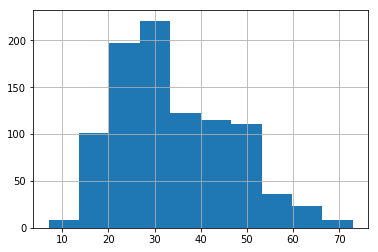

In [22]:
# Draw a histogram of a column (the distribution of ages).
users.age.hist();

**Count the number of occurrences of each value.**

In [23]:
users.gender.value_counts()     # Most useful for categorical variables

M    670
F    273
Name: gender, dtype: int64

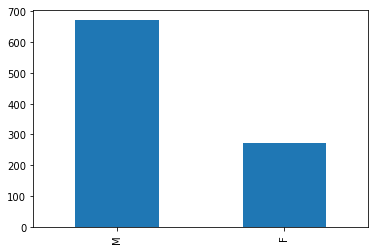

In [24]:
users.gender.value_counts().plot(kind='bar');    # Quick plot by category

In [25]:
# Can also be used with numeric variables
#   Try .sort_index() to sort by indices or .sort_values() to sort by counts.
users.age.value_counts().sort_index().head(10)

7      1
10     1
11     1
13     5
14     3
15     6
16     5
17    14
18    18
19    23
Name: age, dtype: int64

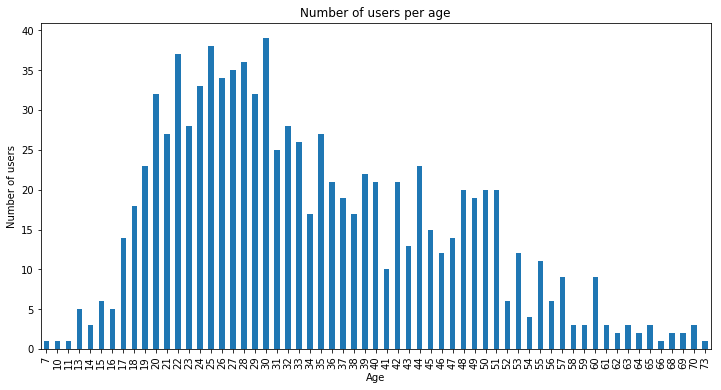

In [26]:
users.age.value_counts().sort_index().plot(kind='bar', figsize=(12,6));     # Bigger plot by increasing age
plt.xlabel('Age');
plt.ylabel('Number of users');
plt.title('Number of users per age');

<a id="exercise-one"></a>
### Exercise 1

In [27]:
# Read drinks.csv into a DataFrame called "drinks".
import pandas as pd


In [28]:
# Print the head and the tail.


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [29]:
# Examine the default index, datatypes, and shape.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [30]:
# Print the beer_servings Series.


0        0
1       89
2       25
3      245
4      217
5      102
6      193
7       21
8      261
9      279
10      21
11     122
12      42
13       0
14     143
15     142
16     295
17     263
18      34
19      23
20     167
21      76
22     173
23     245
24      31
25     231
26      25
27      88
28      37
29     144
      ... 
163    128
164     90
165    152
166    185
167      5
168      2
169     99
170    106
171      1
172     36
173     36
174    197
175     51
176     51
177     19
178      6
179     45
180    206
181     16
182    219
183     36
184    249
185    115
186     25
187     21
188    333
189    111
190      6
191     32
192     64
Name: beer_servings, Length: 193, dtype: int64

In [31]:
# Calculate the average beer_servings for the entire data set.


In [32]:
# Count the number of occurrences of each "continent" value and see if it looks correct.


<a id="filtering-and-sorting"></a>
### Filtering and Sorting
- **Objective:** Filter and sort data using Pandas.

We can use simple operator comparisons on columns to extract relevant or drop irrelevant information.

**Logical filtering: Only show users with age < 20.**

In [33]:
# Create a Series of Booleans…
# In Pandas, this comparison is performed element-wise on each row of data.
young_bool = users.age < 20
young_bool.head(15) 

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: age, dtype: bool

In [34]:
# …and use that Series to filter rows.
# In Pandas, indexing a DataFrame by a Series of Booleans only selects rows that are True in the Boolean.
users[young_bool].head(10)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [35]:
# Or, combine into a single step.
users[users.age < 20].head(10)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
109,110,19,M,student,77840
141,142,13,M,other,48118
178,179,15,M,entertainment,20755


In [36]:
# Important: This creates a view of the original DataFrame, not a new DataFrame.
# If you alter this view (e.g., by storing it in a variable and altering that), then it will alter the original DataFrame.
# Here, notice that Pandas gives you a SettingWithCopyWarning to alert you of this.

users_under20 = users[users.age < 20].copy()   # To resolve this warning, copy the `DataFrame` using `.copy()`.
users_under20['newcolumn'] = 0

In [37]:
# Select one column from the filtered results.
users[users.age < 20].occupation.head(10)

29           student
35           student
51           student
56              none
66           student
67           student
100          student
109          student
141            other
178    entertainment
Name: occupation, dtype: object

In [38]:
# value_counts of resulting Series
users[users.age < 20].occupation.value_counts()

student          64
other             4
none              3
writer            2
entertainment     2
salesman          1
artist            1
Name: occupation, dtype: int64

**Logical filtering with multiple conditions**

In [39]:
# Ampersand for `AND` condition. (This is a "bitwise" `AND`.)
# Important: You MUST put parentheses around each expression because `&` has a higher precedence than `<`.
users[(users.age < 20) & (users.gender=='M')].head()

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146


In [40]:
# Pipe for `OR` condition. (This is a "bitwise" `OR`.)
# Important: You MUST put parentheses around each expression because `|` has a higher precedence than `<`.
users[(users.age < 20) | (users.age > 60)].head(10)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
35,36,19,F,student,93117
51,52,18,F,student,55105
56,57,16,M,none,84010
66,67,17,M,student,60402
67,68,19,M,student,22904
100,101,15,M,student,05146
105,106,61,M,retired,55125
109,110,19,M,student,77840
141,142,13,M,other,48118


In [41]:
# Preferred alternative to multiple `OR` conditions
users[users.occupation.isin(['doctor', 'lawyer'])].head(10)

,user_id,age,gender,occupation,zip_code
9,10,53,M,lawyer,90703
124,125,30,M,lawyer,22202
125,126,28,F,lawyer,20015
137,138,46,M,doctor,53211
160,161,50,M,lawyer,55104
204,205,47,M,lawyer,06371
250,251,28,M,doctor,85032
298,299,29,M,doctor,63108
338,339,35,M,lawyer,37901
364,365,29,M,lawyer,20009


**Sorting**

In [42]:
# Sort a Series.
users.age.sort_values().head(10)

29      7
470    10
288    11
879    13
608    13
141    13
673    13
627    13
812    14
205    14
Name: age, dtype: int64

In [43]:
# Sort a DataFrame by a single column.
users.sort_values('age').head(10)

,user_id,age,gender,occupation,zip_code
29,30,7,M,student,55436
470,471,10,M,student,77459
288,289,11,M,none,94619
879,880,13,M,student,83702
608,609,13,F,student,55106
141,142,13,M,other,48118
673,674,13,F,student,55337
627,628,13,M,none,94306
812,813,14,F,student,02136
205,206,14,F,student,53115


In [44]:
# Use descending order instead.
users.sort_values('age', ascending=False).head(10)

,user_id,age,gender,occupation,zip_code
480,481,73,M,retired,37771
802,803,70,M,administrator,78212
766,767,70,M,engineer,00000
859,860,70,F,retired,48322
584,585,69,M,librarian,98501
558,559,69,M,executive,10022
348,349,68,M,retired,61455
572,573,68,M,retired,48911
210,211,66,M,salesman,32605
650,651,65,M,retired,02903


In [45]:
# Sort by multiple columns.
users.sort_values(['occupation', 'age']).head(10)

,user_id,age,gender,occupation,zip_code
117,118,21,M,administrator,90210
179,180,22,F,administrator,60202
281,282,22,M,administrator,20057
316,317,22,M,administrator,13210
438,439,23,F,administrator,20817
508,509,23,M,administrator,10011
393,394,25,M,administrator,96819
664,665,25,M,administrator,55412
725,726,25,F,administrator,80538
77,78,26,M,administrator,61801


<a id="exercise-two"></a>
### Exercise 2
Use the `drinks.csv` or `drinks` `DataFrame` from earlier to complete the following.

In [46]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [47]:
# Filter DataFrame to only include European countries.


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
1,Albania,89,132,54,4.9,EU
3,Andorra,245,138,312,12.4,EU
7,Armenia,21,179,11,3.8,EU
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [48]:
# Filter DataFrame to only include European countries with wine_servings > 300.


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
3,Andorra,245,138,312,12.4,EU
61,France,127,151,370,11.8,EU
136,Portugal,194,67,339,11.0,EU


In [49]:
# Calculate the average beer_servings for all of Europe.


193.77777777777777

In [50]:
# Determine which 10 countries have the highest total_litres_of_pure_alcohol.


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
15,Belarus,142,373,42,14.4,EU
98,Lithuania,343,244,56,12.9,EU
3,Andorra,245,138,312,12.4,EU
68,Grenada,199,438,28,11.9,NaN
45,Czech Republic,361,170,134,11.8,EU
61,France,127,151,370,11.8,EU
141,Russian Federation,247,326,73,11.5,AS
81,Ireland,313,118,165,11.4,EU
155,Slovakia,196,293,116,11.4,EU
99,Luxembourg,236,133,271,11.4,EU


<a id="columns"></a>
### Renaming, Adding, and Removing Columns

- **Objective:** Manipulate `DataFrame` columns.

beer_servings                   1.000000
spirit_servings                 0.458819
wine_servings                   0.527172
total_litres_of_pure_alcohol    0.835839
Name: beer_servings, dtype: float64


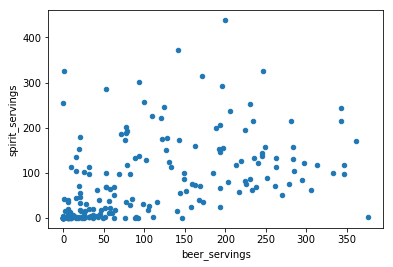

In [51]:
# Are beer servings and spirit servings correlated?
drinks.plot(kind='scatter', x='beer_servings', y='spirit_servings')

print(drinks.corr()['beer_servings'])  # Correlation coefficients

In [52]:
# Rename one or more columns in a single output using value mapping.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}).head(10)

,country,beer,spirit_servings,wine,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [53]:
# Rename one or more columns in the original DataFrame.
drinks.rename(columns={'beer_servings':'beer', 'wine_servings':'wine'}, inplace=True)

In [54]:
# Replace all column names using a list of matching length.
drink_cols = ['country', 'beer', 'spirit', 'wine', 'liters', 'continent'] 

# Replace during file reading (disables the header from the file).
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols)
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


In [55]:
# Replace after file has already been read into Python.
drinks.columns = drink_cols
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country      193 non-null object
beer         193 non-null int64
spirit       193 non-null int64
wine         193 non-null int64
liters       193 non-null float64
continent    170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.1+ KB


**Easy Column Operations**<br>
Rather than having to reference indexes and create for loops to do column-wise operations, Pandas is smart and knows that when we add columns together we want to add the values in each row together.

In [56]:
# Add a new column as a function of existing columns.
drinks['servings'] = drinks.beer + drinks.spirit + drinks.wine
drinks['mL'] = drinks.liters.mul(1000)

drinks.head()

,country,beer,spirit,wine,liters,continent,servings,mL
0,Afghanistan,0,0,0,0.0,AS,0,0.0
1,Albania,89,132,54,4.9,EU,275,4900.0
2,Algeria,25,0,14,0.7,AF,39,700.0
3,Andorra,245,138,312,12.4,EU,695,12400.0
4,Angola,217,57,45,5.9,AF,319,5900.0


**Removing Columns**

In [57]:
# axis=0 for rows, 1 for columns
drinks.drop('mL', axis=1).head(10)

,country,beer,spirit,wine,liters,continent,servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,NaN,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


In [58]:
# Drop multiple columns.
drinks.drop(['mL', 'servings'], axis=1).head()

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [59]:
# Drop on the original DataFrame rather than returning a new one.
drinks.drop(['mL', 'servings'], axis=1, inplace=True)

<a id="missing-values"></a>
### Handling Missing Values

- **Objective:** Know how to handle null and missing values.

Sometimes, values will be missing from the source data or as a byproduct of manipulations. It is very important to detect missing data. Missing data can:

- Make the entire row ineligible to be training data for a model.
- Hint at data-collection errors.
- Indicate improper conversion or manipulation.
- Actually not be missing — it sometimes means "zero," "false," "not applicable," or "entered an empty string."

For example, a `.csv` file might have a missing value in some data fields:

```
tool_name,material,cost
hammer,wood,8
chainsaw,,
wrench,metal,5
```

When this data is imported, "null" values will be stored in the second row (in the "material" and "cost" columns).

> In Pandas, a "null" value is either `None` or `np.NaN` (Not a Number). Many fixed-size numeric datatypes (such as integers) do not have a way of representing `np.NaN`. So, numeric columns will be promoted to floating-point datatypes that do support it. For example, when importing the `.csv` file above:

> - **For the second row:** `None` will be stored in the "material" column and `np.NaN` will be stored in the "cost" column. The entire "cost" column (stored as a single `ndarray`) must be stored as floating-point values to accommodate the `np.NaN`, even though an integer `8` is in the first row.

In [60]:
# Missing values are usually excluded in calculations by default.
drinks.continent.value_counts()              # Excludes missing values in the calculation

AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

In [61]:
# Includes missing values
drinks.continent.value_counts(dropna=False)

AF     53
EU     45
AS     44
NaN    23
OC     16
SA     12
Name: continent, dtype: int64

In [62]:
# Find missing values in a Series.
# True if missing, False if not missing
drinks.continent.isnull().head(10)

0    False
1    False
2    False
3    False
4    False
5     True
6    False
7    False
8    False
9    False
Name: continent, dtype: bool

In [63]:
# Count the missing values — sum() works because True is 1 and False is 0.
drinks.continent.isnull().sum()

23

In [64]:
# True if not missing, False if missing
drinks.continent.notnull().head(10)

0     True
1     True
2     True
3     True
4     True
5    False
6     True
7     True
8     True
9     True
Name: continent, dtype: bool

In [65]:
# Only show rows where continent is not missing.
drinks[drinks.continent.notnull()].head(10)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


**Understanding Pandas Axis**

In [66]:
# Sums "down" the 0 axis (rows) — so, we get the sums of each column
drinks.sum(axis=0)

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [67]:
# axis=0 is the default.
drinks.sum()

country    AfghanistanAlbaniaAlgeriaAndorraAngolaAntigua ...
beer                                                   20489
spirit                                                 15632
wine                                                    9544
liters                                                 910.4
dtype: object

In [68]:
# Sums "across" the 1 axis (columns) — so, we get the sums of numeric values in the row (beer+spirit+wine+liters+…)
drinks.sum(axis=1).head(10)

0      0.0
1    279.9
2     39.7
3    707.4
4    324.9
5    279.9
6    447.3
7    214.8
8    555.4
9    554.7
dtype: float64

**Find missing values in a `DataFrame`.**

In [69]:
# DataFrame of Booleans
drinks.isnull().head()

,country,beer,spirit,wine,liters,continent
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False


country       0
beer          0
spirit        0
wine          0
liters        0
continent    23
dtype: int64


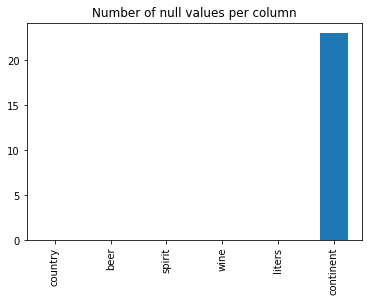

In [70]:
# Count the missing values in each column — remember by default, axis=0.
print(drinks.isnull().sum())

drinks.isnull().sum().plot(kind='bar');         # visually
plt.title('Number of null values per column');

**Dropping Missing Values**

In [71]:
# Drop a row if ANY values are missing from any column — can be dangerous!
drinks.dropna().head(10)

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU
10,Azerbaijan,21,46,5,1.3,EU


In [72]:
# Drop a row only if ALL values are missing.
drinks.dropna(how='all').head(10) 

,country,beer,spirit,wine,liters,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


**Filling Missing Values**<br>
You may have noticed that the continent North America (NA) does not appear in the `continent` column. Pandas read in the original data and saw "NA", thought it was a missing value, and converted it to a `NaN`, missing value.

In [73]:
# Fill in missing values with "NA" — this is dangerous to do without manually verifying them!
drinks.continent = drinks.continent.fillna(value='NA').head(10)

In [74]:
# Modifies "drinks" in-place
drinks.continent.fillna(value='NA', inplace=True)

In [75]:
# Turn off the missing value filter — this is a better approach!
drinks = pd.read_csv('data/drinks.csv', header=0, names=drink_cols, na_filter=False)

<a id="exercise-three"></a>
### Exercise 3

In [76]:
# Read ufo.csv into a DataFrame called "ufo".
ufo_data = 'data/ufo.csv'
ufo = pd.read_csv(ufo_data)
print(ufo.head(1))
ufo.info()

     City Colors Reported Shape Reported State            Time
0  Ithaca             NaN       TRIANGLE    NY  6/1/1930 22:00
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
City               80496 non-null object
Colors Reported    17034 non-null object
Shape Reported     72141 non-null object
State              80543 non-null object
Time               80543 non-null object
dtypes: object(5)
memory usage: 3.1+ MB


In [77]:
# Check the shape of the DataFrame.


(80543, 5)

In [78]:
# What are the three most common colors reported?
ufo['Colors Reported'].value_counts().head(3)

ORANGE    5216
RED       4809
GREEN     1897
Name: Colors Reported, dtype: int64

In [79]:
# Rename any columns with spaces so that they don't contain spaces.
# ufo.columns = ['City', 'Colors_Reported','Shape_Reported','State','Time']
# or
ufo.columns = [c.replace(' ', '_') for c in ufo.columns]
ufo.columns
ufo.rename(columns={c:c.replace(' ','_') for c in ufo.columns})

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [80]:
# For reports in VA, what's the most common city?
ufo[ufo['State'] == 'VA']['City'].value_counts().head(1)

Virginia Beach    110
Name: City, dtype: int64

In [81]:
# Print a DataFrame containing only reports from Arlington, VA.
ufo[(ufo['State']=='VA')&(ufo['City']=='Arlington')].head() 

,City,Colors_Reported,Shape_Reported,State,Time
202,Arlington,GREEN,OVAL,VA,7/13/1952 21:00
6300,Arlington,NaN,CHEVRON,VA,5/5/1990 21:40
10278,Arlington,NaN,DISK,VA,5/27/1997 15:30
14527,Arlington,NaN,OTHER,VA,9/10/1999 21:41
17984,Arlington,RED,DISK,VA,11/19/2000 22:00


In [82]:
# Count the number of missing values in each column.
ufo.isnull().sum()

City                  47
Colors_Reported    63509
Shape_Reported      8402
State                  0
Time                   0
dtype: int64

In [83]:
# How many rows remain if you drop all rows with any missing values? 
ufo.dropna().shape

(15510, 5)

<a id="split-apply-combine"></a>
### Split-Apply-Combine

Split-apply-combine is a pattern for analyzing data. Suppose we want to find mean beer consumption per country. Then:

- **Split:** We group data by continent.
- **Apply:** For each group, we apply the `mean()` function to find the average beer consumption.
- **Combine:** We now combine the continent names with the `mean()`s to produce a summary of our findings.

In [84]:
# For each continent, calculate the mean beer servings.
drinks.groupby('continent').beer.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
NA    145.434783
OC     89.687500
SA    175.083333
Name: beer, dtype: float64

In [85]:
# For each continent, calculate the mean of all numeric columns.
drinks.groupby('continent').mean()

,beer,spirit,wine,liters
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
NA,145.434783,165.739130,24.521739,5.995652
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


In [86]:
# For each continent, describe beer servings.
drinks.groupby('continent').beer.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,61.471698,80.557816,0.0,15.00,32.0,76.00,376.0
AS,44.0,37.045455,49.469725,0.0,4.25,17.5,60.50,247.0
EU,45.0,193.777778,99.631569,0.0,127.00,219.0,270.00,361.0
NA,23.0,145.434783,79.621163,1.0,80.00,143.0,198.00,285.0
OC,16.0,89.687500,96.641412,0.0,21.00,52.5,125.75,306.0
SA,12.0,175.083333,65.242845,93.0,129.50,162.5,198.00,333.0


In [87]:
# Similar, but outputs a DataFrame and can be customized — "agg" allows you to aggregate results of Series functions
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max'])
drinks.groupby('continent').beer.agg(['count', 'mean', 'min', 'max']).sort_values('mean')

,count,mean,min,max
continent,,,,
AS,44,37.045455,0,247
AF,53,61.471698,0,376
OC,16,89.687500,0,306
NA,23,145.434783,1,285
SA,12,175.083333,93,333
EU,45,193.777778,0,361


In [88]:
# For each continent, describe all numeric columns.
drinks.groupby('continent').describe().T

continent             AF          AS          EU          NA          OC  \
beer   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    61.471698   37.045455  193.777778  145.434783   89.687500   
       std     80.557816   49.469725   99.631569   79.621163   96.641412   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%     15.000000    4.250000  127.000000   80.000000   21.000000   
       50%     32.000000   17.500000  219.000000  143.000000   52.500000   
       75%     76.000000   60.500000  270.000000  198.000000  125.750000   
       max    376.000000  247.000000  361.000000  285.000000  306.000000   
liters count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean     3.007547    2.170455    8.617778    5.995652    3.381250   
       std      2.647557    2.770239    3.358455    2.409353    3.345688   
       min      0.000000    0.000000    0.000000    2.200000    0.000000   
       25%      0.700000    0.100000    6.600000    4.300000    1.000000   
       50%      2.300000    1.200000   10.000000    6.300000    1.750000   
       75%      4.700000    2.425000   10.900000    7.000000    6.150000   
       max      9.100000   11.500000   14.400000   11.900000   10.400000   
spirit count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.339623   60.840909  132.555556  165.739130   58.437500   
       std     28.102794   84.362160   77.589115   94.993884   70.504817   
       min      0.000000    0.000000    0.000000   68.000000    0.000000   
       25%      1.000000    1.000000   81.000000  101.000000   18.000000   
       50%      3.000000   16.000000  122.000000  137.000000   37.000000   
       75%     19.000000   98.000000  173.000000  190.500000   65.250000   
       max    152.000000  326.000000  373.000000  438.000000  254.000000   
wine   count   53.000000   44.000000   45.000000   23.000000   16.000000   
       mean    16.264151    9.068182  142.222222   24.521739   35.625000   
       std     38.846419   21.667034   97.421738   28.266378   64.555790   
       min      0.000000    0.000000    0.000000    1.000000    0.000000   
       25%      1.000000    0.000000   59.000000    5.000000    1.000000   
       50%      2.000000    1.000000  128.000000   11.000000    8.500000   
       75%     13.000000    8.000000  195.000000   34.000000   23.250000   
       max    233.000000  123.000000  370.000000  100.000000  212.000000   

continent             SA  
beer   count   12.000000  
       mean   175.083333  
       std     65.242845  
       min     93.000000  
       25%    129.500000  
       50%    162.500000  
       75%    198.000000  
       max    333.000000  
liters count   12.000000  
       mean     6.308333  
       std      1.531166  
       min      3.800000  
       25%      5.250000  
       50%      6.850000  
       75%      7.375000  
       max      8.300000  
spirit count   12.000000  
       mean   114.750000  
       std     77.077440  
       min     25.000000  
       25%     65.750000  
       50%    108.500000  
       75%    148.750000  
       max    302.000000  
wine   count   12.000000  
       mean    62.416667  
       std     88.620189  
       min      1.000000  
       25%      3.000000  
       50%     12.000000  
       75%     98.500000  
       max    221.000000

In [89]:
# For each continent, count the number of rows.
print(drinks.groupby('continent').size())
print(drinks.continent.value_counts())   # should be the same

continent
AF    53
AS    44
EU    45
NA    23
OC    16
SA    12
dtype: int64
AF    53
EU    45
AS    44
NA    23
OC    16
SA    12
Name: continent, dtype: int64


<a id="exercise-four"></a>
### Exercise 4

Use the "users" `DataFrame` or "users" file in the Data folder to complete the following.

In [90]:
users.head(1)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711


In [91]:
# for each occupation in 'users', count the number of occurrences
# users['occupation'].value_counts()
# users.groupby('occupation').size().sort_values(ascending=False)

In [92]:
# For each occupation, calculate the mean age.
# users.groupby('occupation').age.mean().sort_values()

In [93]:
# For each occupation, calculate the minimum and maximum ages.
# users.groupby('occupation')['age'].agg(['min', 'max'])

In [94]:
# For each combination of occupation and gender, calculate the mean age.
users.groupby(['occupation','gender'])['age'].mean()

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

<a id="multiple-columns"></a>
### Selecting Multiple Columns and Filtering Rows

In [95]:
# Select multiple columns — yet another overload of the DataFrame indexing operator!
my_cols = ['City', 'State']     # Create a list of column names...
ufo[my_cols].head(10)                 # ...and use that list to select columns.

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [96]:
# Or, combine into a single step (this is a Python list inside of the Python index operator!).
ufo[['City', 'State']].head()

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY


**Use `loc` to select columns by name.**

In [97]:
# "loc" locates the values from the first parameter (colon means "all rows"), and the column "City".
ufo.loc[:, 'City'].head(10)

0                  Ithaca
1             Willingboro
2                 Holyoke
3                 Abilene
4    New York Worlds Fair
5             Valley City
6             Crater Lake
7                    Alma
8                 Eklutna
9                 Hubbard
Name: City, dtype: object

In [98]:
# Select two columns.
ufo.loc[:, ['City', 'State']].head(10)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [99]:
# Select a range of columns — unlike Python ranges, Pandas index ranges INCLUDE the final column in the range.
ufo.loc[:, 'City':'State'].head()

,City,Colors_Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [100]:
ufo.head(1)

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00


In [101]:
# "loc" can also filter rows by "name" (the index).
# Row 0, all columns
ufo.loc[0, :]

City                       Ithaca
Colors_Reported               NaN
Shape_Reported           TRIANGLE
State                          NY
Time               6/1/1930 22:00
Name: 0, dtype: object

In [102]:
# Rows 0/1/2, all columns
ufo.loc[0:2, :]

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


In [103]:
# Rows 0/1/2, range of columns
ufo.loc[ufo.City=='Ithaca', 'City':'State'] 

,City,Colors_Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
4068,Ithaca,NaN,CIGAR,NY
5631,Ithaca,NaN,OTHER,MI
6961,Ithaca,NaN,OTHER,NY
7573,Ithaca,RED GREEN,LIGHT,NY
9088,Ithaca,NaN,NaN,NY
16537,Ithaca,NaN,FLASH,MI
17049,Ithaca,NaN,TEARDROP,NY
18392,Ithaca,NaN,SPHERE,NY
21335,Ithaca,NaN,CYLINDER,NY


In [104]:
# Use "iloc" to filter rows and select columns by integer position.
# (Remember that rows/columns use indices, so "iloc" lets you refer to indices via their index rather than value!)
# All rows, columns in position 0/3 (City/State)
ufo.iloc[:, [0, 3]].head(10)

,City,State
0,Ithaca,NY
1,Willingboro,NJ
2,Holyoke,CO
3,Abilene,KS
4,New York Worlds Fair,NY
5,Valley City,ND
6,Crater Lake,CA
7,Alma,MI
8,Eklutna,AK
9,Hubbard,OR


In [105]:
# All rows, columns in position 0/1/2/3
# Note here it is NOT INCLUDING 4 because this is an integer range, not a Pandas index range!
ufo.iloc[:, 0:4].head() 

,City,Colors_Reported,Shape_Reported,State
0,Ithaca,NaN,TRIANGLE,NY
1,Willingboro,NaN,OTHER,NJ
2,Holyoke,NaN,OVAL,CO
3,Abilene,NaN,DISK,KS
4,New York Worlds Fair,NaN,LIGHT,NY


In [106]:
# Rows in position 0/1/2, all columns
ufo.iloc[0:3, :] 

,City,Colors_Reported,Shape_Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00


<a id="joining-dataframes"></a>
### Joining (Merging) `DataFrames`

In [107]:
# Read "u.item" into "movies".
import pandas as pd
movie_cols = ['movie_id', 'title']
u_item = 'data/movies.tbl'
movies = pd.read_table(u_item, sep='|', header=None, names=movie_cols, usecols=[0, 1], encoding='latin-1')
movies.head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [108]:
# Read "u.data" into "ratings".
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
u_data = 'data/movie_ratings.tsv'
ratings = pd.read_table(u_data, sep='\t', header=None, names=rating_cols)
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [109]:
# Merge "movies" and "ratings" (inner join on "movie_id").
movie_ratings = pd.merge(movies, ratings)
movie_ratings.head()

,movie_id,title,user_id,rating,timestamp
0,1,Toy Story (1995),308,4,887736532
1,1,Toy Story (1995),287,5,875334088
2,1,Toy Story (1995),148,4,877019411
3,1,Toy Story (1995),280,4,891700426
4,1,Toy Story (1995),66,3,883601324


In [110]:
print movies.shape
print ratings.shape
print movie_ratings.shape

(1682, 2)
(100000, 4)
(100000, 5)


<a id="other-features"></a>
### OPTIONAL: Other Commonly Used Features

In [111]:
def my_func(x): 
    x+=1
    x*=2
    return x 
users.age.apply(my_func)

0       50
1      108
2       48
3       50
4       68
5       86
6      116
7       74
8       60
9      108
10      80
11      58
12      96
13      92
14     100
15      44
16      62
17      72
18      82
19      86
20      54
21      52
22      62
23      44
24      80
25     100
26      82
27      66
28      84
29      16
      ... 
913     90
914    102
915     56
916     46
917     82
918     52
919     62
920     42
921     60
922     44
923     60
924     38
925    100
926     48
927     44
928     90
929     58
930    122
931    118
932     58
933    124
934     86
935     50
936     98
937     78
938     54
939     66
940     42
941     98
942     46
Name: age, Length: 943, dtype: int64

In [112]:
# Apply an arbitrary function to each value of a Pandas column, storing the result in a new column.

users['under30'] = users.age.apply(lambda age: age**2)

In [113]:
# Apply an arbitrary function to each row of a DataFrame, storing the result in a new column.
#  (Remember that, by default, axis=0. Since we want to go row by row, we set axis=1.)
users['under30male'] = users.apply(lambda row: row.age < 30 and row.gender == 'M', axis=1)

In [114]:
# Map existing values to a different set of values.
users['is_male'] = users.gender.map({'F':0, 'M':1})

In [115]:
# Replace all instances of a value in a column (must match entire value).
ufo.State.replace('Fl', 'FL', inplace=True)

In [116]:
# String methods are accessed via "str".
ufo.State.str.upper()                               # Converts to upper case
# checks for a substring
ufo['Colors_Reported'].str.contains('RED', na='False').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Colors_Reported, dtype: object

In [117]:
# Convert a string to the datetime format (this is often slow — consider doing it in the "read_csv()" method.)
ufo['Time'] = pd.to_datetime(ufo.Time)
ufo.Time.dt.hour                        # Datetime format exposes convenient attributes
(ufo.Time.max() - ufo.Time.min()).days  # Also allows you to do datetime "math"

30776

In [118]:
# Set and then remove an index.
ufo.set_index('Time', inplace=True)
ufo.reset_index(inplace=True)

In [119]:
# Change the datatype of a column.
drinks['beer'] = drinks.beer.astype('float')

In [120]:
# Create dummy variables for "continent" and exclude first dummy column.
continent_dummies = pd.get_dummies(drinks.continent, prefix='cont').iloc[:, 1:]

In [121]:
# Concatenate two DataFrames (axis=0 for rows, axis=1 for columns).
drinks = pd.concat([drinks, continent_dummies], axis=1)

<a id="uncommon-features"></a>
### OPTIONAL: Other Less-Used Features of Pandas

In [122]:
# Detecting duplicate rows
users.duplicated()          # True if a row is identical to a previous row
users.duplicated().sum()    # Count of duplicates
users[users.duplicated()]   # Only show duplicates
users.drop_duplicates()     # Drop duplicate rows
users.age.duplicated()      # Check a single column for duplicates
users.duplicated(['age', 'gender', 'zip_code']).sum()   # Specify columns for finding duplicates

13

In [123]:
# Convert a range of values into descriptive groups.
drinks['beer_level'] = 'low'    # Initially set all values to "low"
drinks.loc[drinks.beer.between(101, 200), 'beer_level'] = 'med'     # Change 101-200 to "med"
drinks.loc[drinks.beer.between(201, 400), 'beer_level'] = 'high'    # Change 201-400 to "high"

In [124]:
# Display a cross-tabulation of two Series.
pd.crosstab(drinks.continent, drinks.beer_level)

beer_level,high,low,med
continent,,,
AF,4,45,4
AS,1,40,3
EU,24,9,12
NA,5,8,10
OC,3,11,2
SA,3,1,8


In [125]:
# Convert "beer_level" into the "category" datatype.
drinks['beer_level'] = pd.Categorical(drinks.beer_level, categories=['low', 'med', 'high'])
drinks.sort_values('beer_level').head(10)   # Sorts by the categorical ordering (low to high)

,country,beer,spirit,wine,liters,continent,cont_AS,cont_EU,cont_NA,cont_OC,cont_SA,beer_level
0,Afghanistan,0.0,0,0,0.0,AS,1,0,0,0,0,low
102,Malaysia,13.0,4,0,0.3,AS,1,0,0,0,0,low
103,Maldives,0.0,0,0,0.0,AS,1,0,0,0,0,low
104,Mali,5.0,1,1,0.6,AF,0,0,0,0,0,low
106,Marshall Islands,0.0,0,0,0.0,OC,0,0,0,1,0,low
107,Mauritania,0.0,0,0,0.0,AF,0,0,0,0,0,low
108,Mauritius,98.0,31,18,2.6,AF,0,0,0,0,0,low
101,Malawi,8.0,11,1,1.5,AF,0,0,0,0,0,low
110,Micronesia,62.0,50,18,2.3,OC,0,0,0,1,0,low
112,Mongolia,77.0,189,8,4.9,AS,1,0,0,0,0,low


In [126]:
# Limit which rows are read when reading in a file — useful for large files!
pd.read_csv('data/drinks.csv', nrows=10)           # Only read first 10 rows

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,NaN
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


In [127]:
pd.read_csv('data/drinks.csv', skiprows=[1, 2]).head(10)    # Skip the first two rows of data

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Algeria,25,0,14,0.7,AF
1,Andorra,245,138,312,12.4,EU
2,Angola,217,57,45,5.9,AF
3,Antigua & Barbuda,102,128,45,4.9,NaN
4,Argentina,193,25,221,8.3,SA
5,Armenia,21,179,11,3.8,EU
6,Australia,261,72,212,10.4,OC
7,Austria,279,75,191,9.7,EU
8,Azerbaijan,21,46,5,1.3,EU
9,Bahamas,122,176,51,6.3,NaN


In [128]:
# Write a DataFrame out to a .csv
drinks.to_csv('drinks_updated.csv')                 # Index is used as first column
drinks.to_csv('drinks_updated.csv', index=False)    # Ignore index

In [129]:
# Create a DataFrame from a dictionary.
pd.DataFrame({'capital':['Montgomery', 'Juneau', 'Phoenix'], 'state':['AL', 'AK', 'AZ']})

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [130]:
# Create a DataFrame from a list of lists.
pd.DataFrame([['Montgomery', 'AL'], ['Juneau', 'AK'], ['Phoenix', 'AZ']], columns=['capital', 'state'])

,capital,state
0,Montgomery,AL
1,Juneau,AK
2,Phoenix,AZ


In [131]:
# Randomly sample a DataFrame.
import numpy as np
mask = np.random.rand(len(drinks)) < 0.66   # Create a Series of Booleans
train = drinks[mask]                        # Will contain around 66% of the rows
test = drinks[~mask]                        # Will contain the remaining rows

In [132]:
# Change the maximum number of rows and columns printed ('None' means unlimited).
pd.set_option('max_rows', None)     # Default is 60 rows
pd.set_option('max_columns', None)  # Default is 20 columns
print drinks

                          country   beer  spirit  wine  liters continent  \
0                     Afghanistan    0.0       0     0     0.0        AS   
1                         Albania   89.0     132    54     4.9        EU   
2                         Algeria   25.0       0    14     0.7        AF   
3                         Andorra  245.0     138   312    12.4        EU   
4                          Angola  217.0      57    45     5.9        AF   
5               Antigua & Barbuda  102.0     128    45     4.9        NA   
6                       Argentina  193.0      25   221     8.3        SA   
7                         Armenia   21.0     179    11     3.8        EU   
8                       Australia  261.0      72   212    10.4        OC   
9                         Austria  279.0      75   191     9.7        EU   
10                     Azerbaijan   21.0      46     5     1.3        EU   
11                        Bahamas  122.0     176    51     6.3        NA   
12          

In [133]:
# Reset options to defaults.
pd.reset_option('max_rows')
pd.reset_option('max_columns')

In [134]:
# Change the options temporarily (settings are restored when you exit the "with" block).
with pd.option_context('max_rows', None, 'max_columns', None):
    print(drinks)

                          country   beer  spirit  wine  liters continent  \
0                     Afghanistan    0.0       0     0     0.0        AS   
1                         Albania   89.0     132    54     4.9        EU   
2                         Algeria   25.0       0    14     0.7        AF   
3                         Andorra  245.0     138   312    12.4        EU   
4                          Angola  217.0      57    45     5.9        AF   
5               Antigua & Barbuda  102.0     128    45     4.9        NA   
6                       Argentina  193.0      25   221     8.3        SA   
7                         Armenia   21.0     179    11     3.8        EU   
8                       Australia  261.0      72   212    10.4        OC   
9                         Austria  279.0      75   191     9.7        EU   
10                     Azerbaijan   21.0      46     5     1.3        EU   
11                        Bahamas  122.0     176    51     6.3        NA   
12          

<a id="summary"></a>
### Summary

Believe it or not, we've only barely touched the surface of everything that Pandas offers. Don't worry if you don't remember most of it — for now, just knowing what exists is key. Remember that the more you use Pandas to manipulate data, the more of these functions you will take interest in, look up, and remember.

In this notebook, the most important things to familiarize yourself with are the basics:
- Manipulating `DataFrames` and `Series`
- Filtering columns and rows
- Handling missing values
- Split-apply-combine (this one takes some practice!)